In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.utils import to_categorical
import random
from funcs_8_lab_beaver_pizza_panda import *

In [2]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
IMG_SIZE = (IMG_HEIGHT, IMG_WIDTH)
BATCH_SIZE = 16
EPOCHS = 50

train_dir = '..\\cnn_data\\3_classes'
beaver_dir = os.path.join(train_dir, 'beaver')
pizza_dir = os.path.join(train_dir, 'pizza')
panda_dir = os.path.join(train_dir, 'panda')

print(f"Количество изображений бобров: {len(os.listdir(beaver_dir))}")
print(f"Количество изображений пицц: {len(os.listdir(pizza_dir))}")
print(f"Количество изображений панд: {len(os.listdir(panda_dir))}")

Количество изображений бобров: 46
Количество изображений пицц: 53
Количество изображений панд: 38


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,     
    seed=42
)

validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

Found 111 images belonging to 3 classes.
Found 26 images belonging to 3 classes.


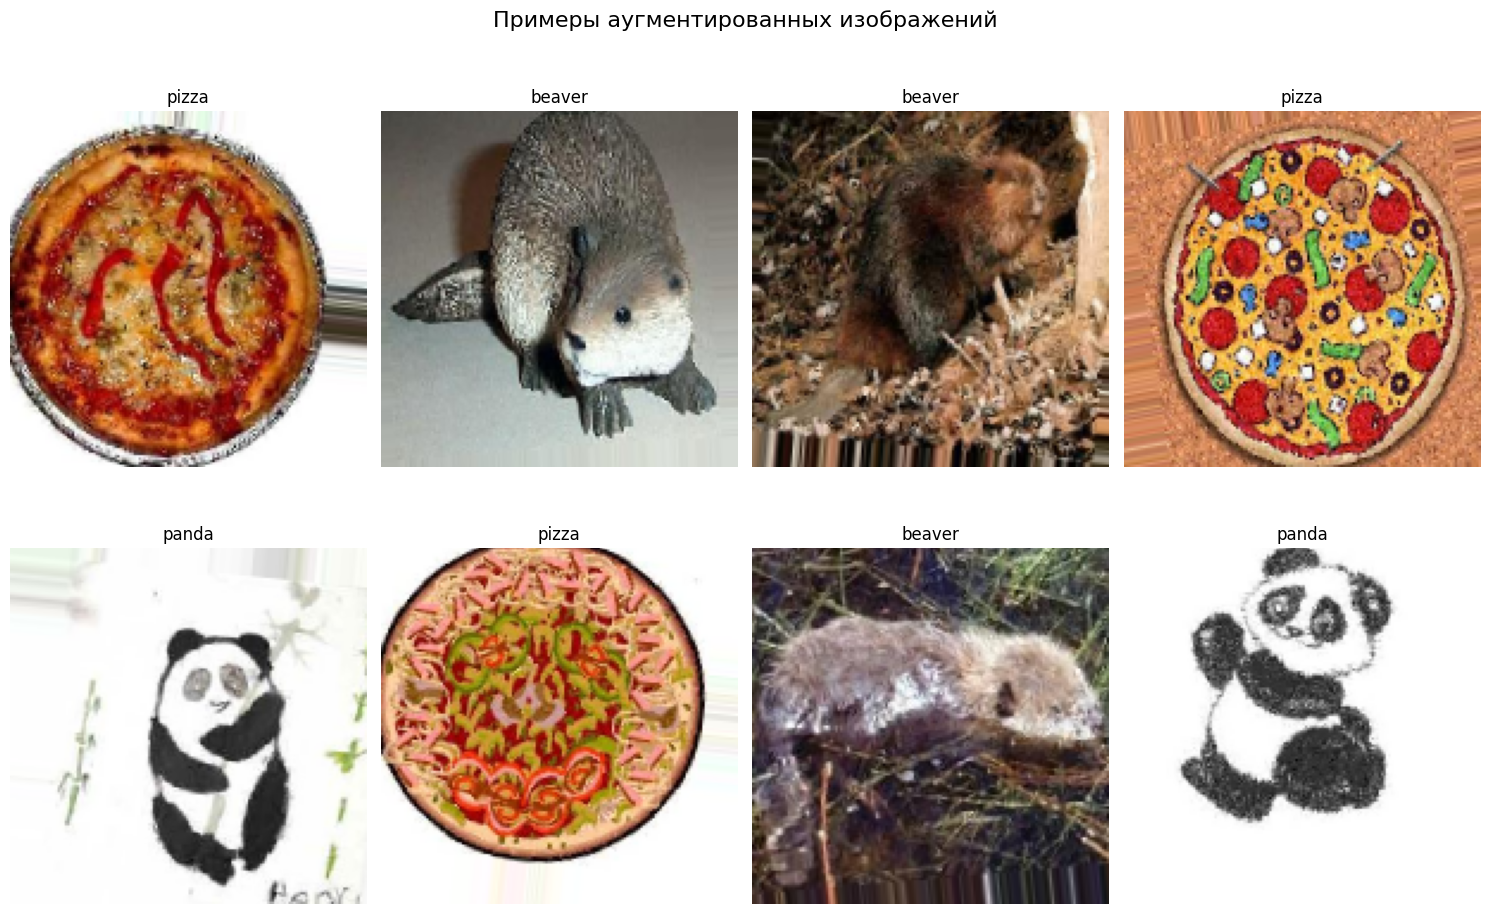

In [5]:
show_augmented_images(train_generator)

In [6]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-7
)

inception_model, inception_base = create_inception_model()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [7]:
inception_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 3, 3, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,065,443 (84.17 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
history_inception_initial = inception_model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/20


c:\Users\My Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 359ms/step - accuracy: 0.5292 - loss: 1.2913 - val_accuracy: 0.9231 - val_loss: 0.1268 - learning_rate: 0.0010
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.9029 - loss: 0.2721 - val_accuracy: 0.9615 - val_loss: 0.1890 - learning_rate: 0.0010
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9744 - loss: 0.0632 - val_accuracy: 0.9615 - val_loss: 0.3675 - learning_rate: 0.0010
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.9868 - loss: 0.0832 - val_accuracy: 0.9615 - val_loss: 0.4137 - learning_rate: 0.0010
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9864 - loss: 0.0274 - val_accuracy: 0.9615 - val_loss: 0.3114 - learning_rate: 0.0010
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9615 - val_loss: 0.2704 - learning_rate: 0.0010
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 1.0000 - loss: 0.0176 - val_accuracy: 0.9615 - va

In [9]:
inception_model = fine_tune_model(inception_model, inception_base, 'InceptionV3')

history_inception_fine = inception_model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Размораживаем слои начиная с 291 для InceptionV3
Общее количество слоев: 311
Количество размороженных слоев: 20
Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 355ms/step - accuracy: 0.9636 - loss: 0.1515 - val_accuracy: 0.9615 - val_loss: 0.1733 - learning_rate: 1.0000e-05
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.9774 - loss: 0.0999 - val_accuracy: 0.9615 - val_loss: 0.1659 - learning_rate: 1.0000e-05
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.9747 - loss: 0.1120 - val_accuracy: 0.9615 - val_loss: 0.1607 - learning_rate: 1.0000e-05
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.9642 - loss: 0.1526 - val_accuracy: 0.9615 - val_loss: 0.1587 - learning_rate: 1.0000e-05
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.9771 - loss: 0.1189 - val_accuracy: 0.9615 - val_loss: 0.1540 - learning_rate: 1.0000e-05
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.9913 - loss: 0.1145 - val_accuracy: 0.9615 - val_loss:

In [10]:
vgg_model, vgg_base = create_vgg_model()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [11]:
vgg_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 4, 4, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,090,435 (76.64 MB)

 Trainable params: 66,051 (258.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [12]:
history_vgg_initial = vgg_model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 567ms/step - accuracy: 0.5214 - loss: 1.0522 - val_accuracy: 0.6923 - val_loss: 0.8568 - learning_rate: 0.0010
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 527ms/step - accuracy: 0.5129 - loss: 0.9916 - val_accuracy: 0.8077 - val_loss: 0.6387 - learning_rate: 0.0010
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 519ms/step - accuracy: 0.6325 - loss: 0.7378 - val_accuracy: 0.8077 - val_loss: 0.5589 - learning_rate: 0.0010
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 519ms/step - accuracy: 0.8342 - loss: 0.5173 - val_accuracy: 0.8846 - val_loss: 0.4633 - learning_rate: 0.0010
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 518ms/step - accuracy: 0.8660 - loss: 0.4876 - val_accuracy: 0.9231 - val_loss: 0.3877 - learning_rate: 0.0010
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 516ms/step - accuracy: 0.8827 - loss: 0.3978 - val_accuracy: 0.8462 - val_loss: 0.3524 - learning_rate: 0.0010
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 517ms/step - accuracy: 0.8892 - loss: 0.3071 - val_accuracy: 

In [13]:
vgg_model = fine_tune_model(vgg_model, vgg_base, 'VGG19')

history_vgg_fine = vgg_model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Размораживаем слои начиная с 18 для VGG19
Общее количество слоев: 22
Количество размороженных слоев: 4
Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 626ms/step - accuracy: 0.8828 - loss: 0.3778 - val_accuracy: 0.9231 - val_loss: 0.3376 - learning_rate: 1.0000e-05
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 586ms/step - accuracy: 0.8743 - loss: 0.3444 - val_accuracy: 0.9231 - val_loss: 0.2753 - learning_rate: 1.0000e-05
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 615ms/step - accuracy: 0.9356 - loss: 0.2228 - val_accuracy: 0.9231 - val_loss: 0.2442 - learning_rate: 1.0000e-05
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 583ms/step - accuracy: 0.9263 - loss: 0.1726 - val_accuracy: 0.9231 - val_loss: 0.2273 - learning_rate: 1.0000e-05
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 593ms/step - accuracy: 0.9689 - loss: 0.1729 - val_accuracy: 0.9231 - val_loss: 0.2248 - learning_rate: 1.0000e-05
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 579ms/step - accuracy: 0.9650 - loss: 0.1712 - val_accuracy: 0.9231 - val_loss: 0.1920 -

In [14]:
history_inception_combined = combine_histories(history_inception_initial, history_inception_fine)
history_vgg_combined = combine_histories(history_vgg_initial, history_vgg_fine)

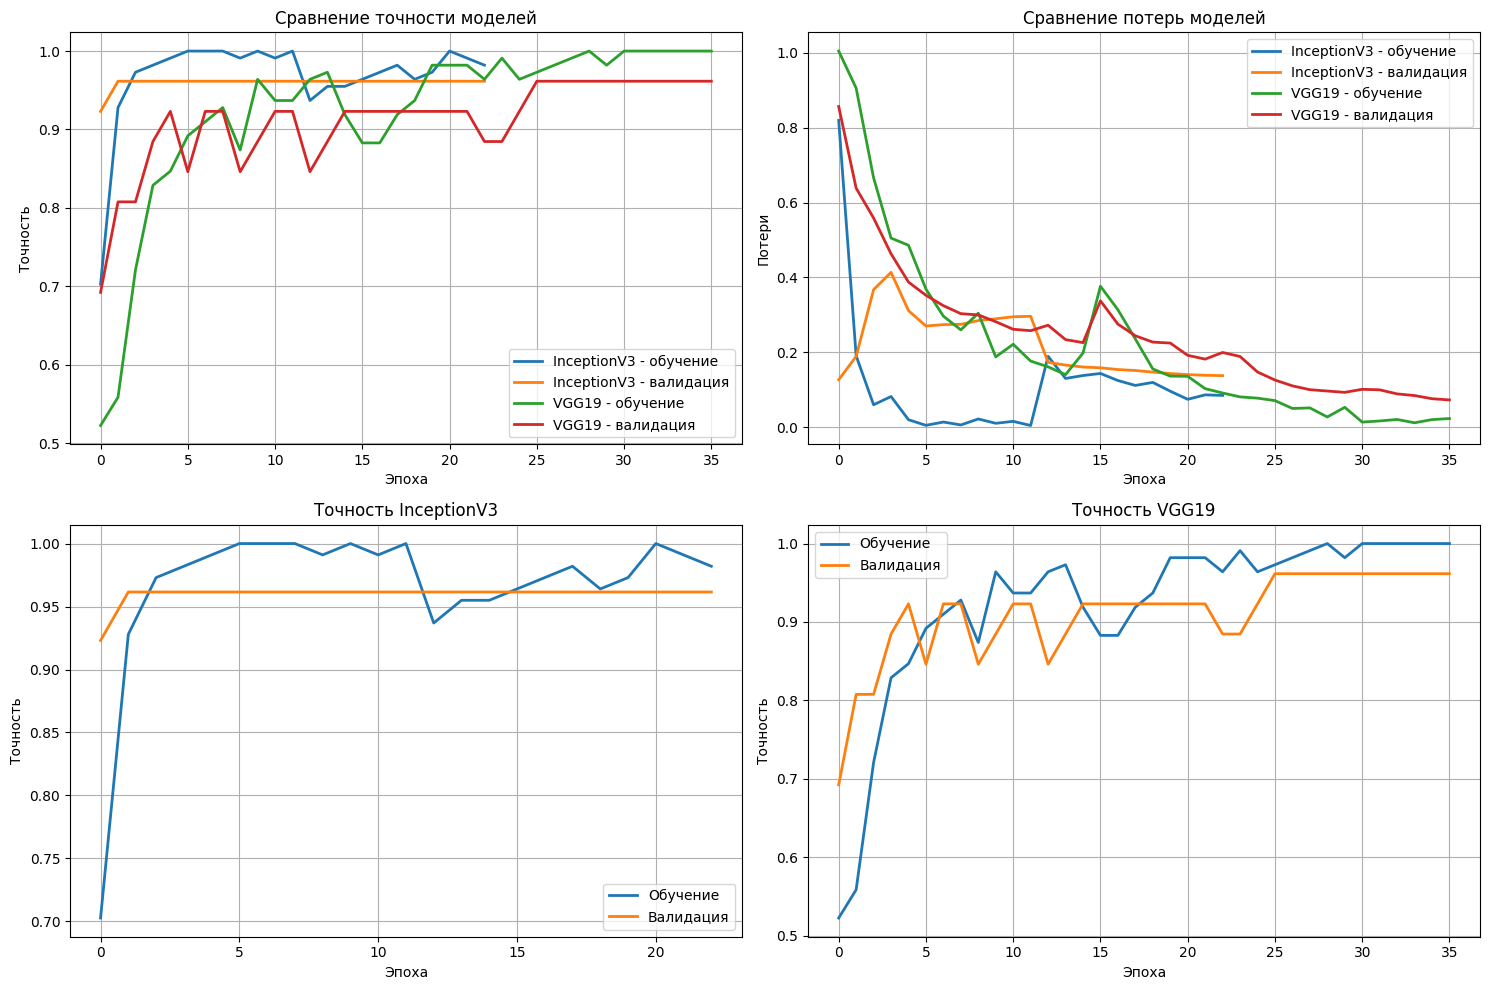

In [15]:
plot_comparison(history_inception_combined, history_vgg_combined, 'InceptionV3', 'VGG19')

In [16]:
inception_scores = inception_model.evaluate(validation_generator, verbose=0)
vgg_scores = vgg_model.evaluate(validation_generator, verbose=0)

print(f"InceptionV3 - Loss: {inception_scores[0]:.4f}, Accuracy: {inception_scores[1]:.4f}")
print(f"VGG19 - Loss: {vgg_scores[0]:.4f}, Accuracy: {vgg_scores[1]:.4f}")

InceptionV3 - Loss: 0.1733, Accuracy: 0.9615
VGG19 - Loss: 0.1260, Accuracy: 0.9615


In [17]:
results_table = create_results_table(
    history_inception_combined, history_vgg_combined, 
    inception_scores, vgg_scores
)

print(results_table.to_string(index=False, float_format='%.4f'))

     Модель  Финальная точность (валидация)  Финальные потери (валидация)  Максимальная точность на обучении  Максимальная точность на валидации  Минимальные потери на валидации  Количество эпох
InceptionV3                          0.9615                        0.1733                             1.0000                              0.9615                           0.1268               23
      VGG19                          0.9615                        0.1260                             1.0000                              0.9615                           0.0728               36


In [23]:
best_model = vgg_model

In [25]:
class_names = list(train_generator.class_indices.keys())
print(f"Классы: {class_names}")

Классы: ['beaver', 'panda', 'pizza']



Предсказания InceptionV3:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


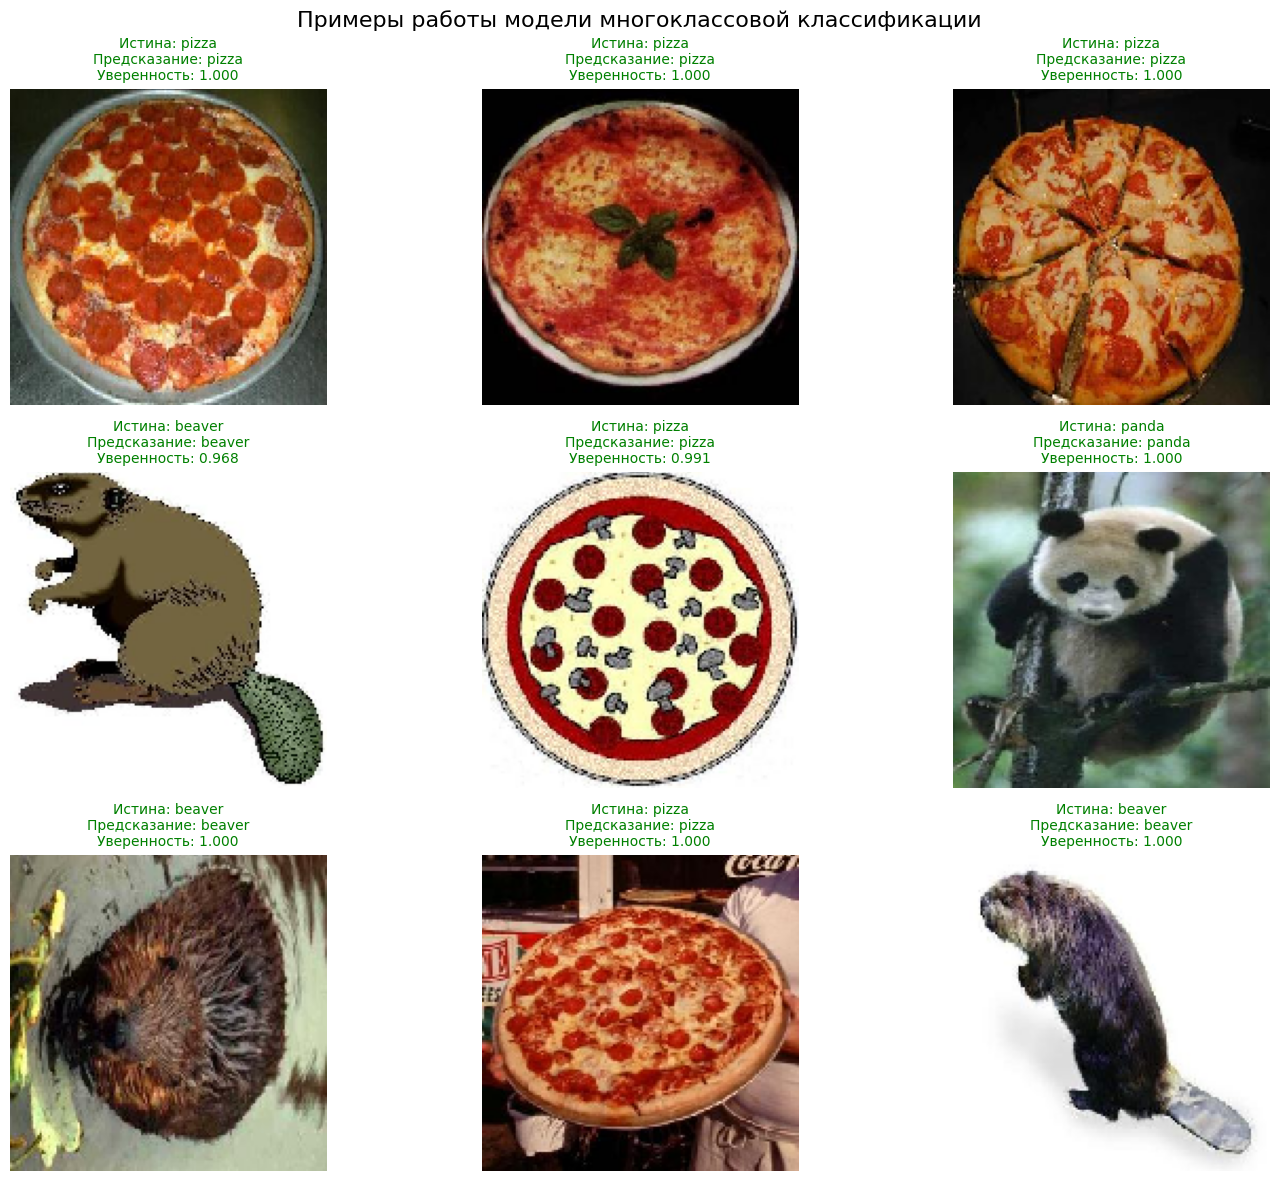

In [26]:
print(f"\nПредсказания InceptionV3:")
show_predictions_multiclass(inception_model, train_dir, IMG_SIZE, class_names, samples_per_class=5)


Предсказания VGG19:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


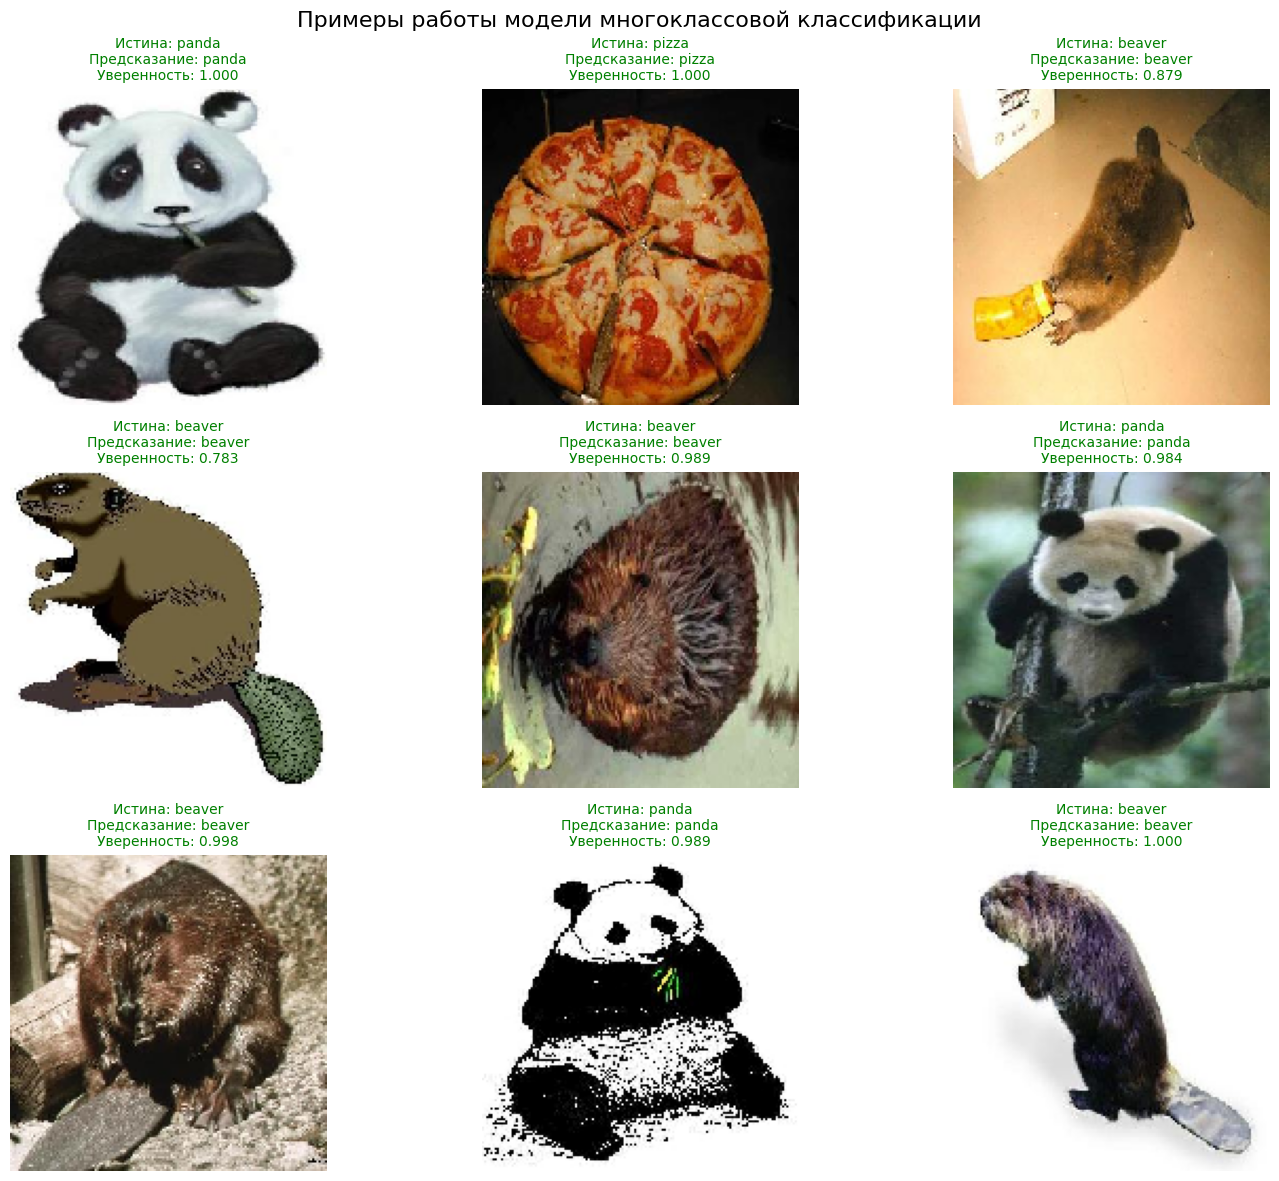

In [27]:
print(f"\nПредсказания VGG19:")
show_predictions_multiclass(vgg_model, train_dir, IMG_SIZE, class_names, samples_per_class=5)